In [1]:
# Importar librerías necesarias
import pandas as pd  # Manejo de datos tabulares (DataFrames)
import geopandas as gpd  # Extensión de pandas para datos geoespaciales
from shapely.geometry import Point  # Para construir geometrías de puntos a partir de coordenadas
import matplotlib.pyplot as plt  # Librería para generar gráficos
import imageio  # Para crear archivos GIF a partir de imágenes
import os  # Para gestionar carpetas y archivos en el sistema

In [2]:
# Cargar el conjunto de datos desde datos.gov.co en formato JSON (hasta 1 millón de registros)
minas = pd.read_json("https://www.datos.gov.co/resource/sgp4-3e6k.json?$limit=1000000")
# Visualizar el DataFrame cargado con los eventos relacionados con minas antipersonal en Colombia
minas

,tipo_evento,departamento,codigo_dane_departamento,municipio,codigo_dane_municipio,a_o,mes,evento,tipo_lugar,tipo_area,latitud_cabecera,longitud_cabecera,sitio,geocoded_column
0,Sospecha de campo minado,SANTANDER,68,SAN VICENTE DE CHUCURÍ,68689,2014,10,Incidente,Fincas,Rural,6.840730,-73.530090,Sospecha De Campo Minado,"{'type': 'Point', 'coordinates': [-73.53009, 6..."
1,Sospecha de campo minado,SANTANDER,68,EL CARMEN,68235,2013,9,Incidente,Campo,Rural,6.724160,-73.609230,Sospecha De Campo Minado,"{'type': 'Point', 'coordinates': [-73.60923, 6..."
2,Sospecha de campo minado,ANTIOQUIA,5,GRANADA,5313,2015,4,Incidente,Campo,Rural,6.117380,-75.102590,Sospecha De Campo Minado,"{'type': 'Point', 'coordinates': [-75.10259, 6..."
3,Desminado militar en operaciones,ARAUCA,81,ARAUQUITA,81065,2015,5,Incidente,Oleoductos,Rural,7.010011,-71.448306,Vereda Peralonso,"{'type': 'Point', 'coordinates': [-71.44830556..."
4,Accidente por MAP,NORTE DE SANTANDER,54,TIBÚ,54810,2015,5,Accidente,Sin informacion,Rural,8.846389,-72.799722,Sector La Virgen,"{'type': 'Point', 'coordinates': [-72.79972222..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39166,Desminado militar en operaciones,CAUCA,19,ARGELIA,19050,2023,6,Incidente,Sin informacion,Rural,2.441389,-77.207222,PUERTO RICO,"{'type': 'Point', 'coordinates': [-77.20722222..."
39167,Sospecha de campo minado,NORTE DE SANTANDER,54,LA PLAYA,54398,2023,7,Incidente,Sin informacion,Rural,8.214130,-73.237771,Sede seccion primaria de la sede principal del...,"{'type': 'Point', 'coordinates': [-73.237771, ..."
39168,Desminado militar en operaciones,META,50,PUERTO RICO,50590,2023,2,Incidente,Sin informacion,Rural,2.895556,-73.461944,VEREDA LAS PALMAS,"{'type': 'Point', 'coordinates': [-73.46194444..."
39169,Desminado militar en operaciones,NARIÑO,52,TUMACO,52835,2023,7,Incidente,Sin informacion,Rural,1.367500,-78.710000,PUSBI ALTO,"{'type': 'Point', 'coordinates': [-78.71, 1.36..."


In [3]:
# Crear una nueva columna 'geometry' con objetos geoespaciales Point a partir de la longitud y latitud reportadas
minas['geometry'] = minas.apply(lambda row: Point(row['longitud_cabecera'], row['latitud_cabecera']), axis=1)

# Convertir el DataFrame en un GeoDataFrame, lo cual permite realizar análisis y visualización geoespacial
minas = gpd.GeoDataFrame(minas, geometry='geometry')

# Definir el sistema de referencia espacial (CRS) como WGS84 (EPSG:4326), basado en coordenadas geográficas
minas.set_crs(epsg=4326, inplace=True)

# Crear columna de tipo datetime combinando año y mes, fijando el día como 1 para normalizar
minas['fecha'] = pd.to_datetime(dict(year=minas['a_o'], month=minas['mes'], day=1))

# Visualizar el GeoDataFrame resultante con datos temporales y geoespaciales listos para análisis
minas

,tipo_evento,departamento,codigo_dane_departamento,municipio,codigo_dane_municipio,a_o,mes,evento,tipo_lugar,tipo_area,latitud_cabecera,longitud_cabecera,sitio,geocoded_column,geometry,fecha
0,Sospecha de campo minado,SANTANDER,68,SAN VICENTE DE CHUCURÍ,68689,2014,10,Incidente,Fincas,Rural,6.840730,-73.530090,Sospecha De Campo Minado,"{'type': 'Point', 'coordinates': [-73.53009, 6...",POINT (-73.53009 6.84073),2014-10-01
1,Sospecha de campo minado,SANTANDER,68,EL CARMEN,68235,2013,9,Incidente,Campo,Rural,6.724160,-73.609230,Sospecha De Campo Minado,"{'type': 'Point', 'coordinates': [-73.60923, 6...",POINT (-73.60923 6.72416),2013-09-01
2,Sospecha de campo minado,ANTIOQUIA,5,GRANADA,5313,2015,4,Incidente,Campo,Rural,6.117380,-75.102590,Sospecha De Campo Minado,"{'type': 'Point', 'coordinates': [-75.10259, 6...",POINT (-75.10259 6.11738),2015-04-01
3,Desminado militar en operaciones,ARAUCA,81,ARAUQUITA,81065,2015,5,Incidente,Oleoductos,Rural,7.010011,-71.448306,Vereda Peralonso,"{'type': 'Point', 'coordinates': [-71.44830556...",POINT (-71.44831 7.01001),2015-05-01
4,Accidente por MAP,NORTE DE SANTANDER,54,TIBÚ,54810,2015,5,Accidente,Sin informacion,Rural,8.846389,-72.799722,Sector La Virgen,"{'type': 'Point', 'coordinates': [-72.79972222...",POINT (-72.79972 8.84639),2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39166,Desminado militar en operaciones,CAUCA,19,ARGELIA,19050,2023,6,Incidente,Sin informacion,Rural,2.441389,-77.207222,PUERTO RICO,"{'type': 'Point', 'coordinates': [-77.20722222...",POINT (-77.20722 2.44139),2023-06-01
39167,Sospecha de campo minado,NORTE DE SANTANDER,54,LA PLAYA,54398,2023,7,Incidente,Sin informacion,Rural,8.214130,-73.237771,Sede seccion primaria de la sede principal del...,"{'type': 'Point', 'coordinates': [-73.237771, ...",POINT (-73.23777 8.21413),2023-07-01
39168,Desminado militar en operaciones,META,50,PUERTO RICO,50590,2023,2,Incidente,Sin informacion,Rural,2.895556,-73.461944,VEREDA LAS PALMAS,"{'type': 'Point', 'coordinates': [-73.46194444...",POINT (-73.46194 2.89556),2023-02-01
39169,Desminado militar en operaciones,NARIÑO,52,TUMACO,52835,2023,7,Incidente,Sin informacion,Rural,1.367500,-78.710000,PUSBI ALTO,"{'type': 'Point', 'coordinates': [-78.71, 1.36...",POINT (-78.71 1.3675),2023-07-01


In [4]:
# Consultar el sistema de referencia espacial (CRS) actualmente asignado al GeoDataFrame
minas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Contar la frecuencia de cada tipo de evento registrado (accidente, desminado, sospecha, etc.)
minas["tipo_evento"].value_counts()

,count
tipo_evento,
Desminado militar en operaciones,25932
Accidente por MAP,7042
Incautaciones,3494
Sospecha de campo minado,2366
Accidente por MUSE,257
Municiones sin explotar,44
Producción de Minas (Fábrica),28
Arsenal almacenada,8


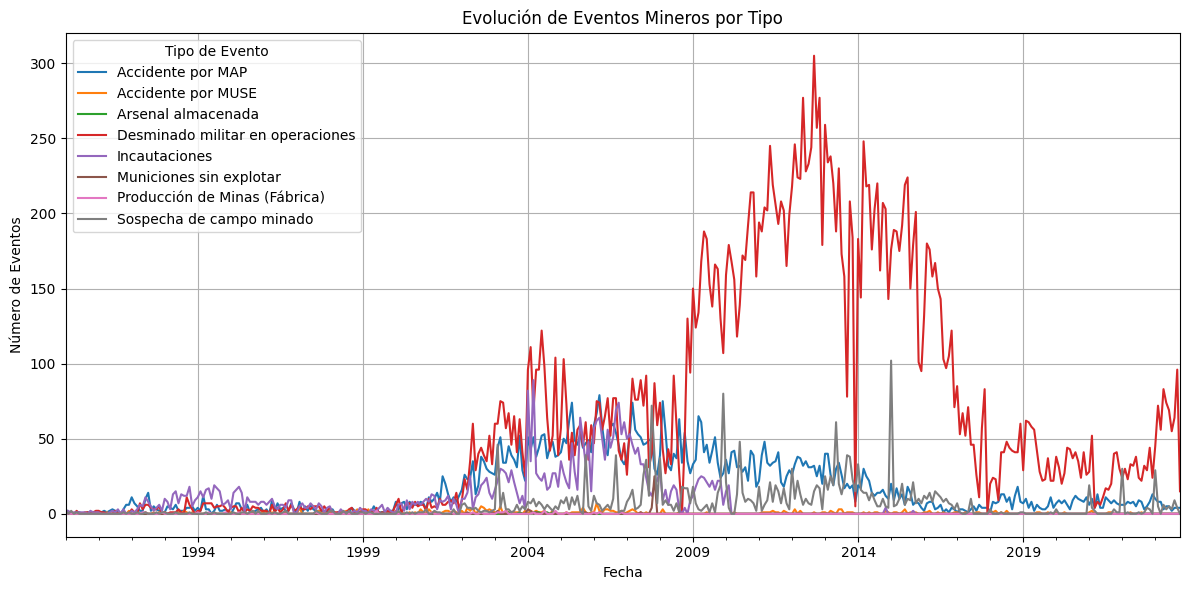

In [6]:
# Agrupar los datos por fecha y tipo de evento, contando el número de ocurrencias por combinación
evento_por_fecha = minas.groupby(['fecha', 'tipo_evento']).size().unstack(fill_value=0)

# Graficar la evolución temporal de los eventos por tipo usando líneas
evento_por_fecha.plot(kind='line', figsize=(12, 6))

# Personalización del gráfico: título, etiquetas, cuadrícula y leyenda
plt.title('Evolución de Eventos Mineros por Tipo')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Tipo de Evento')
plt.show()

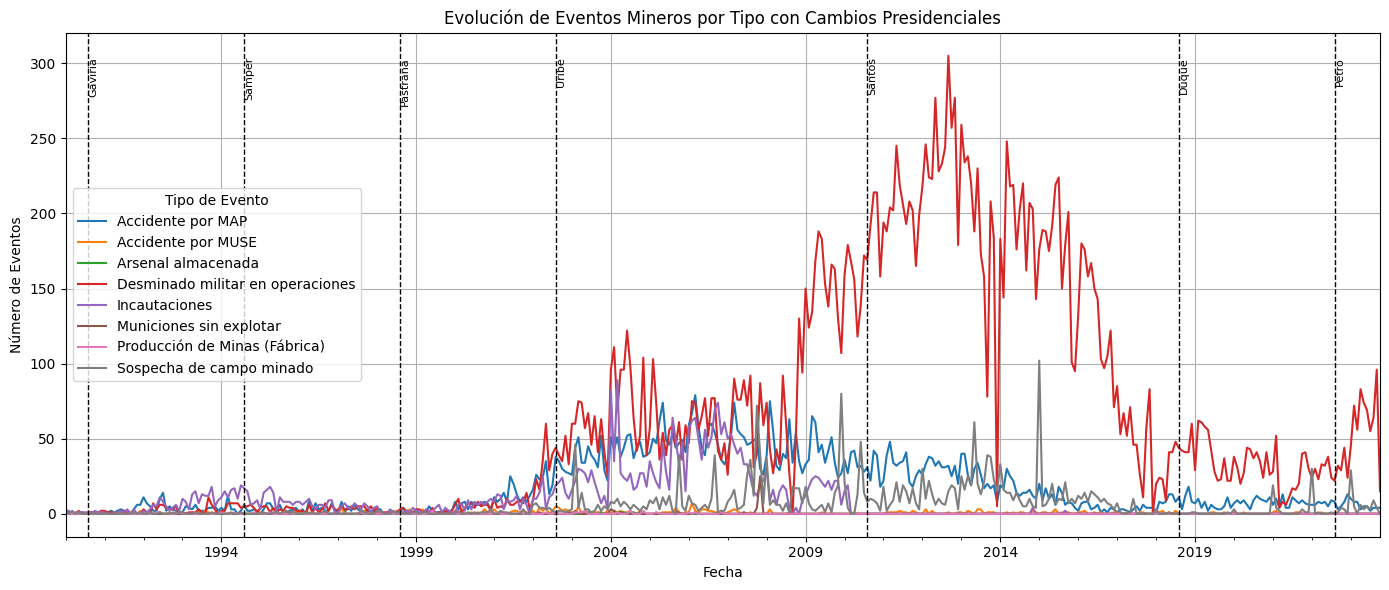

In [7]:
# Definir los inicios de periodos presidenciales en Colombia (desde 1990) con sus respectivas fechas
presidentes = {
    'Gaviria': '1990-08-07',
    'Samper': '1994-08-07',
    'Pastrana': '1998-08-07',
    'Uribe': '2002-08-07',
    'Santos': '2010-08-07',
    'Duque': '2018-08-07',
    'Petro': '2022-08-07'
}

# Convertir las fechas a formato datetime para poder graficarlas correctamente
fechas_presidentes = {k: pd.to_datetime(v) for k, v in presidentes.items()}

# Graficar la evolución temporal de eventos mineros por tipo, como línea de tiempo
evento_por_fecha.plot(kind='line', figsize=(14, 6))
plt.title('Evolución de Eventos Mineros por Tipo con Cambios Presidenciales')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.grid(True)

# Agregar líneas verticales que marcan el inicio de cada gobierno, con etiquetas rotadas
for nombre, fecha in fechas_presidentes.items():
    plt.axvline(fecha, color='black', linestyle='--', linewidth=1)  # Línea vertical
    plt.text(fecha, plt.ylim()[1]*0.95, nombre, rotation=90, verticalalignment='top',
             fontsize=8, color='black')  # Nombre del presidente en la parte superior

# Mostrar leyenda y ajustar diseño
plt.legend(title='Tipo de Evento')
plt.tight_layout()
plt.show()



In [8]:
# Cargar el shapefile comprimido (.zip) que contiene los límites geográficos de los municipios de Colombia
municipios = gpd.read_file("/content/drive/MyDrive/2025-1/Semana 12/Parte 2/COL_Municipio.zip")

# Visualizar el GeoDataFrame resultante con la geometría de cada municipio
municipios

,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry
0,05001,2559097,3.798647e+08,1.072579e+05,05001000,"POLYGON ((-8423087.868 710530.773, -8423036.11..."
1,05002,20493,5.155810e+08,1.282157e+05,05002000,"POLYGON ((-8400992.107 663049.702, -8400902.90..."
2,05004,2763,2.935562e+08,8.885140e+04,05004000,"POLYGON ((-8469712.412 753218.991, -8469679.34..."
3,05021,4746,1.294922e+08,7.572552e+04,05021000,"POLYGON ((-8352494.01 715689.897, -8352304.867..."
4,05030,31600,8.456353e+07,5.066772e+04,05030000,"POLYGON ((-8425665.892 679202.38, -8425597.038..."
...,...,...,...,...,...,...
1117,97889,1108,4.669929e+09,4.292950e+05,97889000,"POLYGON ((-7759205.373 123549.666, -7759311.32..."
1118,99001,20500,1.234376e+10,6.149489e+05,99001000,"POLYGON ((-7546884.015 705017.769, -7546632.27..."
1119,99524,9705,1.844082e+10,8.362720e+05,99524000,"POLYGON ((-7684507.959 690786.085, -7684118.07..."
1120,99624,4235,3.992354e+09,3.642825e+05,99624000,"POLYGON ((-7866588.235 600460.855, -7866405.66..."


In [9]:
# Consultar el sistema de referencia espacial (CRS) del GeoDataFrame de municipios
municipios.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
# Reproyectar el GeoDataFrame de municipios al sistema de coordenadas geográficas WGS84 (EPSG:4326)
municipios = municipios.to_crs(epsg=4326)

<Axes: >

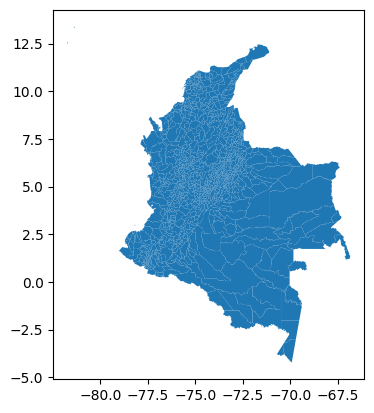

In [11]:
# Graficar un mapa base con los límites geográficos de todos los municipios de Colombia
municipios.plot()

In [12]:
# Instalar las librerías necesarias para crear gráficos y generar archivos GIF animados
!pip install imageio matplotlib

In [13]:
# Filtrar eventos correspondientes únicamente a operaciones de desminado militar
desminado = minas[minas["tipo_evento"] == "Desminado militar en operaciones"].copy()

# Extraer el año de cada evento y almacenarlo en una nueva columna
desminado["anio"] = desminado["fecha"].dt.year

# Obtener la lista de años únicos con eventos de desminado, ordenados cronológicamente
anios = sorted(desminado["anio"].unique())

# Crear una carpeta temporal donde se guardarán las imágenes por año
os.makedirs("frames_gif", exist_ok=True)

# Iterar por cada año y generar un gráfico con los eventos de desminado de ese año
for anio in anios:
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(f"Desminado Militar - Año {anio}", fontsize=14)

    # Dibujar el mapa base de municipios como fondo geográfico
    municipios.plot(ax=ax, facecolor='lightgrey', edgecolor='white', linewidth=0.5)

    # Filtrar los eventos del año actual y graficarlos como puntos rojos
    eventos_anio = desminado[desminado["anio"] == anio]
    eventos_anio.plot(ax=ax, color='red', markersize=10, alpha=0.6)

    # Definir límites espaciales para enfocar el mapa en Colombia
    ax.set_xlim(-80, -65)
    ax.set_ylim(-5, 15)
    ax.axis('off')  # Ocultar ejes para una mejor estética
    plt.tight_layout()

    # Guardar la imagen del año actual en la carpeta temporal
    filepath = f"frames_gif/desminado_{anio}.png"
    plt.savefig(filepath, dpi=150)
    plt.close()  # Cerrar figura para liberar memoria

In [24]:
# Crear una lista para almacenar las imágenes como fotogramas del GIF
frames = []
for anio in anios:
    image_path = f"frames_gif/desminado_{anio}.png"
    frames.append(imageio.v2.imread(image_path))  # Leer cada imagen y añadirla a la lista

# Generar el archivo GIF animado con una duración de 2 segundos por frame
imageio.mimsave("desminado_evolucion.gif", frames, duration=2, loop=0)

print("✅ GIF guardado como 'desminado_evolucion.gif'")

✅ GIF guardado como 'desminado_evolucion.gif'


In [29]:
!jupyter nbconvert --to html "drive/MyDrive/2025-1/Semana 11/Minas_Antipersona.ipynb"

[NbConvertApp] Converting notebook drive/MyDrive/2025-1/Semana 11/Minas_Antipersona.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 903855 bytes to drive/MyDrive/2025-1/Semana 11/Minas_Antipersona.html
